In [35]:
%matplotlib inline
import pandas_datareader.data as web    # pandas 0.19.x and later
import datetime
import pandas as pd
import numpy as np
import math
import scipy.stats as stats

In [27]:
def confidence_interval(data, av):
    sample_stdev = np.std(data)
    sigma = sample_stdev/math.sqrt(len(data))
    return stats.t.interval(alpha = 0.95, df= 24, loc=av, scale=sigma) 

# data

In [56]:
start = datetime.datetime(2010, 4, 17)
end = datetime.datetime(2018, 1, 31)

In [57]:
bond_index_tickers = ["BAMLCC0A0CMTRIV", "BAMLCC0A1AAATRIV", "BAMLCC0A2AATRIV", "BAMLCC0A3ATRIV", 
                      "BAMLCC0A4BBBTRIV", "BAMLCC1A013YTRIV", "BAMLCC2A035YTRIV", "BAMLCC3A057YTRIV"]

In [72]:
len(bondindices)

2058

In [58]:
bondindices = web.DataReader(bond_index_tickers, "fred", start, end)

In [59]:
autocors = pd.DataFrame()
for col in bondindices:
    autocors[col] = [bondindices[col].pct_change().autocorr(lag=lag) for lag in range(25)]

## Confidence intervals for:
1. autocors mean
2. autocors abs mean
3. kurtosis 

In [69]:
lower_k, upper_k = confidence_interval(bondindices.pct_change().kurtosis(), bondindices.pct_change().kurtosis().mean())

In [70]:
print('Kurtosis conf intervals = ', lower_k, upper_k)

Kurtosis conf intervals =  1.364835425987627 2.2127119289581882


In [68]:
autocors_lower = []
autocors_upper = []

autocors_abs_lower = []
autocors_abs_upper = []

kurt_lower = []
kurt_upper = []
for i in range(len(autocors)):
    lower, upper = confidence_interval(autocors.iloc[i], autocors.iloc[i].mean())
    autocors_lower.append(lower)
    autocors_upper.append(upper)
    
    abs_lower, abs_upper = confidence_interval(autocors.abs().iloc[i], autocors.abs().iloc[i].mean())
    autocors_abs_lower.append(abs_lower)
    autocors_abs_upper.append(abs_upper)


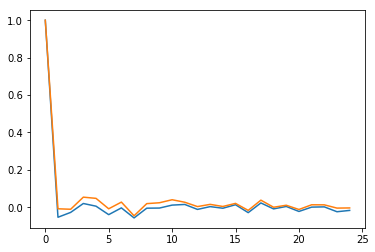

In [64]:
pd.Series(autocors_lower).plot()
pd.Series(autocors_upper).plot()

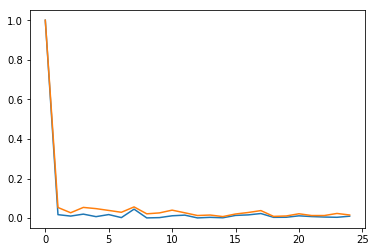

In [65]:
pd.Series(autocors_abs_lower).plot()
pd.Series(autocors_abs_upper).plot()

In [28]:
autocors.mean().mean()

0.040293593417437726

In [29]:
autocors.abs().mean().mean()

0.06537605016329542